In [2]:
# Abalone Case Study
#Problem Statement:
#The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

#Attribute Information

#Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

#Name / Data Type / Measurement Unit / Description

#Sex / nominal / -- / M, F, and I (infant)
#Length / continuous / mm / Longest shell measurement
#Diameter / continuous / mm / perpendicular to length
#Height / continuous  / mm / with meat in shell
#Whole weight / continuous / grams / whole abalone
#Shucked weight / continuous / grams / weight of meat
#Viscera weight / continuous / grams / gut weight (after bleeding)
#Shell weight / continuous / grams / after being dried
#Rings / integer / -- / +1.5 gives the age in years. 

#You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
# The objective of this project is to predict the age of abalone from rings of each abalone measurements using data file abalone.csv which is provided in link ('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv').

In [4]:
# Import Required Libraries/Datasets

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# READING DATA

In [7]:
abalone_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [8]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
# Here size of dataset is 4177 rows and 9 columns and the target variable is Rings

In [10]:
abalone_data.head() # printing the top 5 lines of database

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
# Data Description
#Sex: Sex (M: Male, F: Female, I: Infant)

#Length: Longest Shell measurement (millimetres - mm)

#Diameter: Diameter - perpendicular to length (mm)

#Height: Height - with meat in shell (mm)

#Whole weight: Weight of whole abalone (grams)

#Shucked weight: Weight of meat (grams)

#Viscera weight: Gut weight after bleeding (grams)

#Shell weight: Shell weight - after being dried (grams)

#Rings: Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)

In [12]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
# from above output we have 4177 rows with no null values and 9 columns with datatype bifurcation 7float 1int and 1 object

In [15]:
abalone_data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [16]:
# we have  9 columns with datatype bifurcation 7float 1int and 1 object

In [17]:
# checking for the Null values present in the dataframe

In [18]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [19]:
# there is no null values present in the dataset so we can proceed.

In [20]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [21]:
# The analysis shows that the Ring attribute values ranges from 1 to 29 rings on an abalone specimen. However, the most frequent values of Rings are highly concentrated around the median of the distribution, so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation. We observe that its possible to approximate the distribution of this attribute to a normal curve.

In [22]:
abalone_data.shape

(4177, 9)

In [23]:
# we have 4177 rows and 9 column in data frame

In [24]:
# Univariate analysis
# It means analysis of individual attributes with different visualization method. Lets see how target variable Rings look.

In [25]:
# Target attribute

In [26]:
abalone_data.Rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [27]:
# here we have checked the count,mean,std,max,min first, second and third quartile value of the Target variable

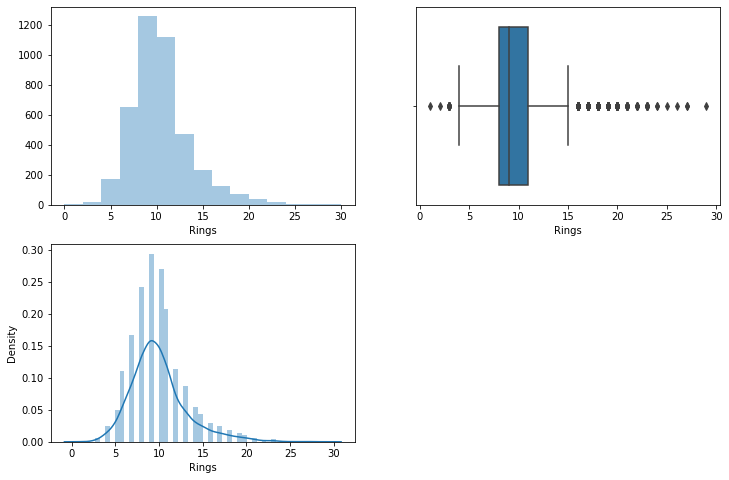

In [30]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);

In [31]:
# It looks better normal distribution, mean changes from 10 to 9.

In [32]:
#Size attributes
# Size attributes includes dimension of abalone which comprises about abalone height, diameter and length. We will observe these attributes by showing them with histogram and boxplot.

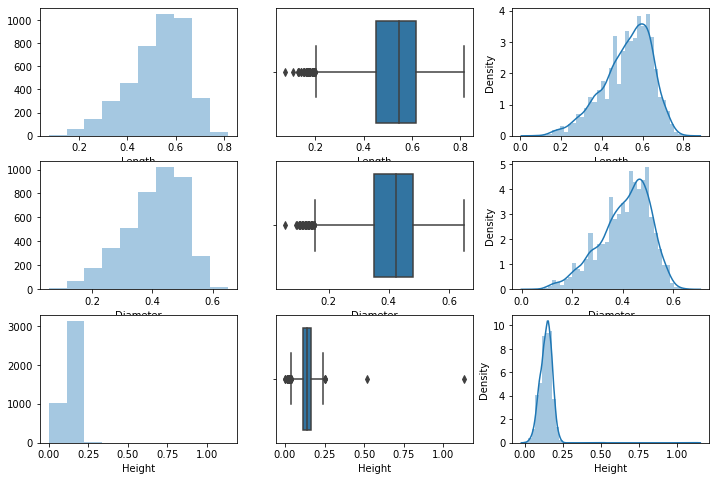

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins = 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins= 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);

In [34]:
# Once more, we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram.
# Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.Thats outlier.
# Thus, we filter these outliers in order to obtain a more realistic visualization of the distribution of the Height attribute:

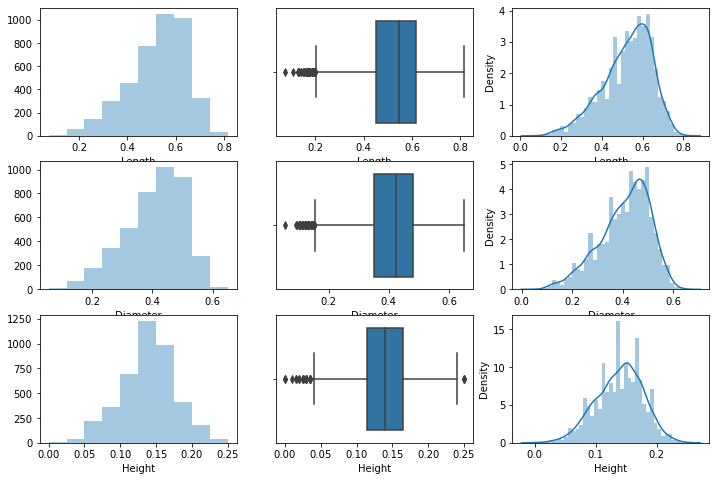

In [35]:
abalone_data = abalone_data[abalone_data['Height'] < 0.4]
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins = 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);

In [36]:
# Weight attributes
# The weight attributes includes rest of the wiights attributes and were analyzed following a similar approach to the Size attributes analysis. A similar distributions were observed, however, for the weight attributes the bell curve is a little larger

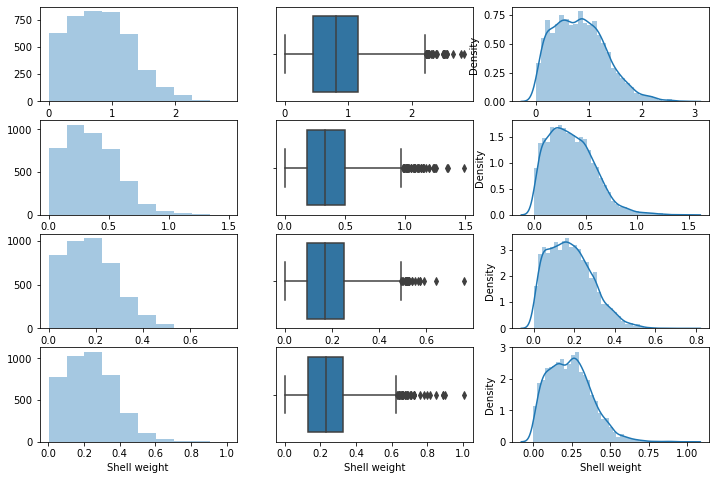

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
sns.distplot(abalone_data['Whole weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(abalone_data['Whole weight']);
plt.subplot(4,3,3)
sns.distplot(abalone_data['Whole weight']);

plt.subplot(4,3,4)
sns.distplot(abalone_data['Shucked weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(abalone_data['Shucked weight']);
plt.subplot(4,3,6)
sns.distplot(abalone_data['Shucked weight']);

plt.subplot(4,3,7)
sns.distplot(abalone_data['Viscera weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(abalone_data['Viscera weight']);
plt.subplot(4,3,9)
sns.distplot(abalone_data['Viscera weight']);

plt.subplot(4,3,10)
sns.distplot(abalone_data['Shell weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(abalone_data['Shell weight']);
plt.subplot(4,3,12)
sns.distplot(abalone_data['Shell weight']);

In [38]:
# SEX attribute- categorical variable
# The Sex attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant (an abalone which is not adult). 
# We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

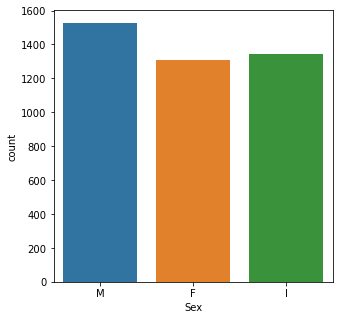

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(abalone_data.Sex);

In [40]:
# Multivariate Analysis
# In this section we analyzed how the dataset attributes are related and how the independent variables influences the target variable. Our first step in the multivariate analysis was to visualize the correlation matrix in a heatmap:

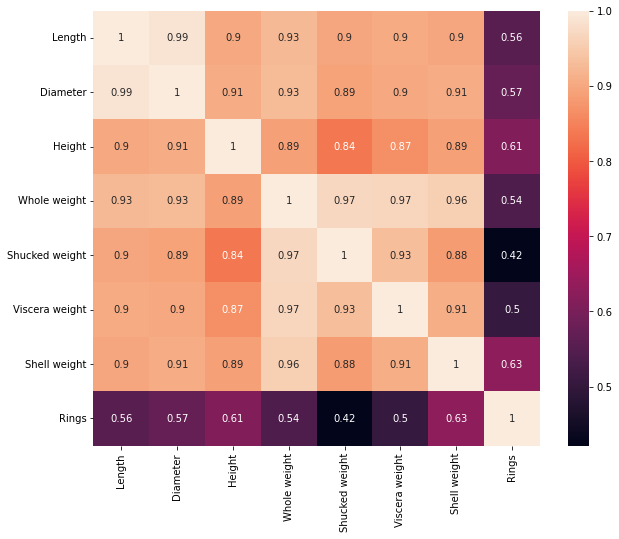

In [41]:
plt.figure(figsize = (10,8))
sns.heatmap(abalone_data.corr(), annot = True); # annot = true : to display the correlation value in the graph.

In [42]:
# Analyzing the correlation matrix, we notice that Height and Shell weight are the attributes that most correlates to Rings.
# Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings:

<Figure size 720x360 with 0 Axes>

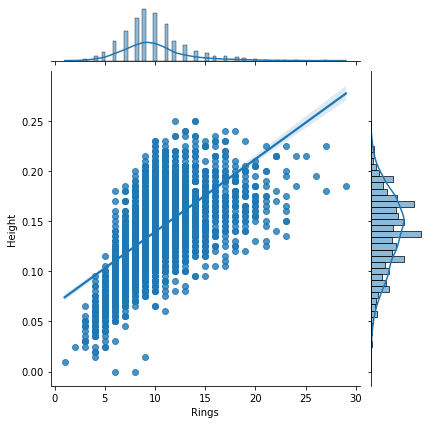

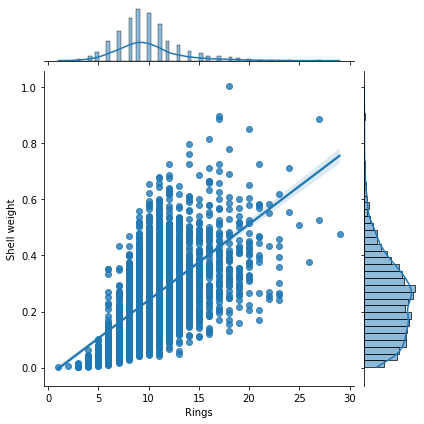

In [43]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=abalone_data, x='Rings', y='Height', kind='reg');
sns.jointplot(data=abalone_data, x='Rings', y='Shell weight', kind='reg');

In [44]:
# How correlation varies with the number of rings:
# Based on the previous analysis, we decided to investigate the variation of the correlation regarding the number of rings in more detail.
# We tested for many values, and found that the region delimited by Rings < 10 has greater correlation between the independent attributes and the target variable.

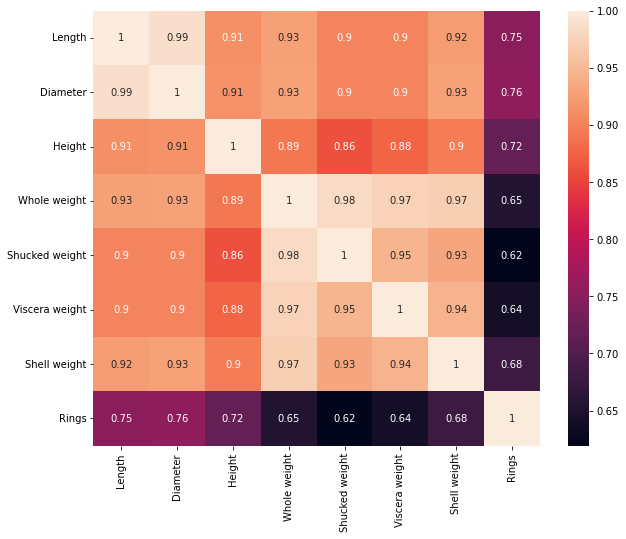

In [45]:
i_abalone = abalone_data[abalone_data['Rings'] < 10]

plt.figure(figsize=(10, 8))
corr = i_abalone.corr()
sns.heatmap(corr, annot=True);

In [46]:
# correlation between size attributes and Rings

<Figure size 1440x360 with 0 Axes>

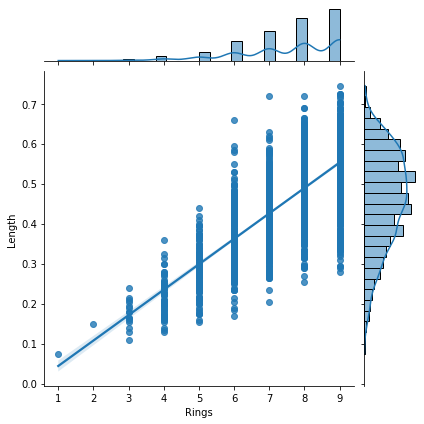

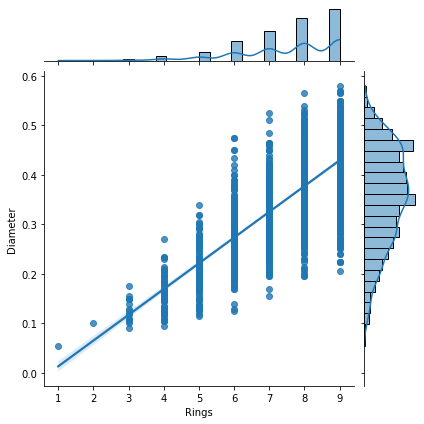

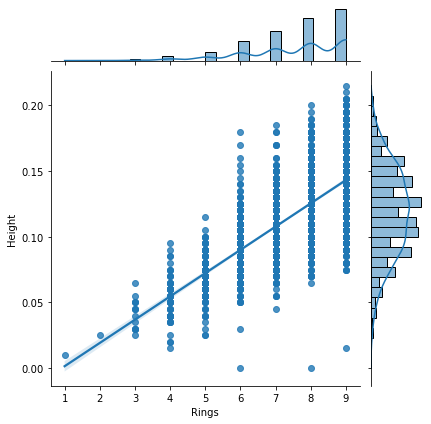

In [47]:
plt.figure(figsize=(20, 5))

sns.jointplot(data=i_abalone, x='Rings', y='Length', kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Diameter', kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg')

In [48]:
# The violin plots bellow show that the median of Size attributes increases as instances are grouped by Rings:

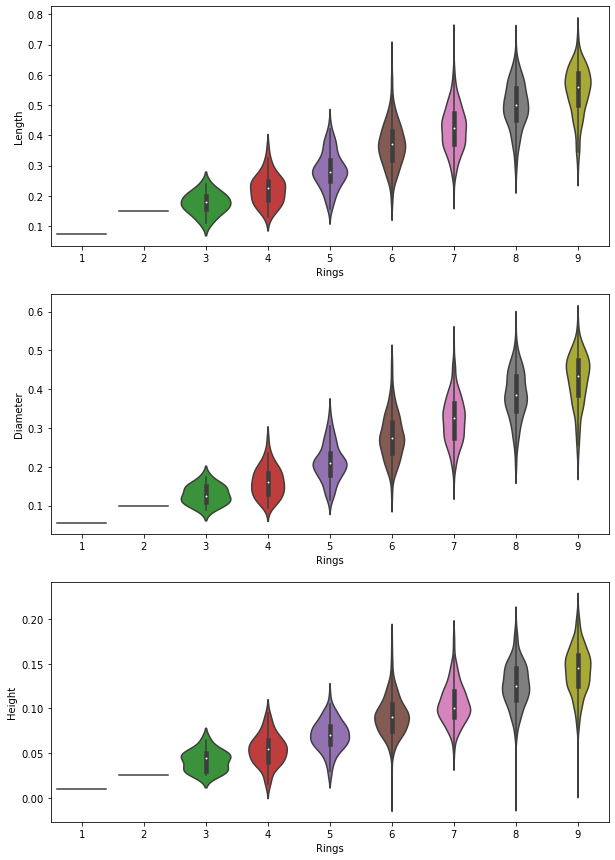

In [49]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.violinplot(data=i_abalone, x='Rings', y='Length')
plt.subplot(3,1,2)
sns.violinplot(data=i_abalone, x='Rings', y='Diameter')
plt.subplot(3,1,3)
sns.violinplot(data=i_abalone, x='Rings', y='Height');

In [50]:
# We observe a similar result where comparing Height and Shell weight to Rings:

<Figure size 1440x360 with 0 Axes>

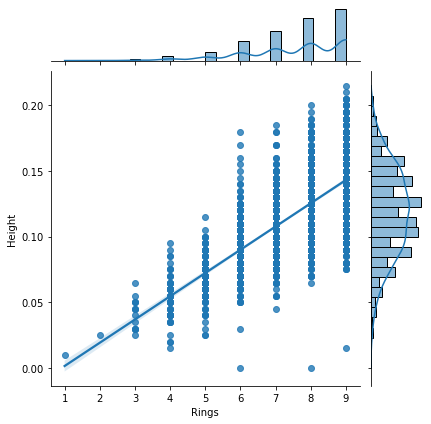

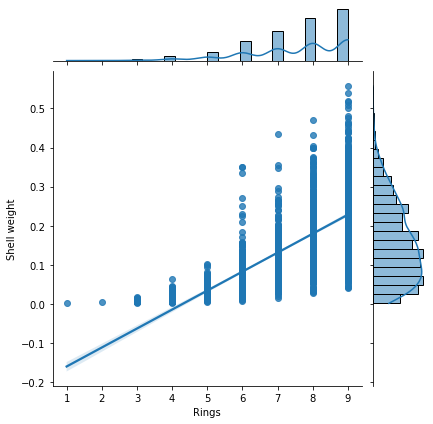

In [51]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg');
sns.jointplot(data=i_abalone, x='Rings', y='Shell weight', kind='reg');

In [52]:
# On the other hand, when we consider only samples with more than 10 Rings we observe that correlation decays drastically to near 0 (zero)

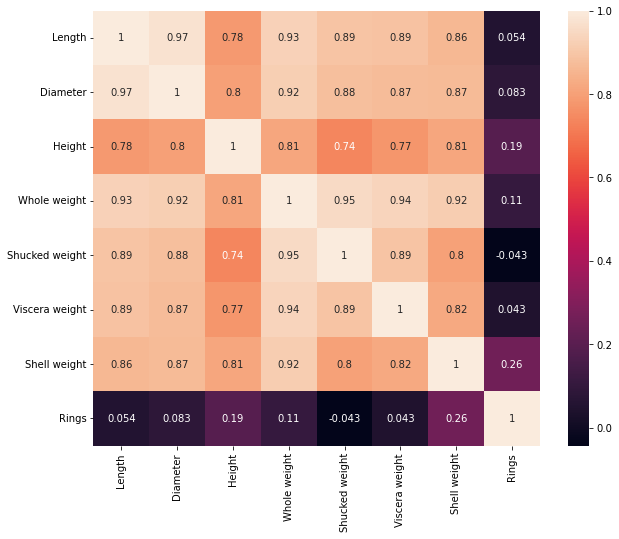

In [53]:
# How correlation shows when Rings more than 10
a_abalone = abalone_data[abalone_data['Rings'] >= 10]

plt.figure(figsize=(10, 8))
corr = a_abalone.corr()
sns.heatmap(corr, annot=True);

<Figure size 1440x720 with 0 Axes>

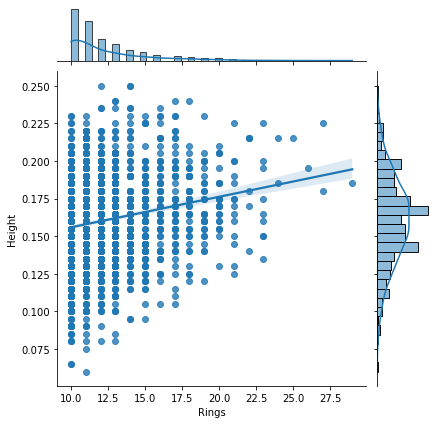

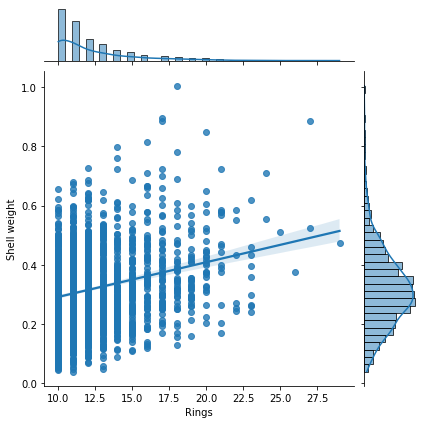

In [54]:
plt.figure(figsize=(20, 10))

sns.jointplot(data=a_abalone, y='Height', x='Rings', kind='reg');
sns.jointplot(data=a_abalone, y='Shell weight', x='Rings', kind='reg');

In [55]:
# These results suggest that abalones grows in size and weight until a certain age, near 10 years. After this age their size and age remains stable in function of age, depending more on environmental factors.

In [56]:
# Influence of Sex on attributes
# Finally, we analyze how the Sex category influences the distribution of variables Rings, Height and Shell weight.
# Our objective is learn if the different categories of abalones have different distribution parameters or even form.
# To accomplish this objective, we visualize the distribution of each one of these parameters in relation to Sex.
# Finally, we analyze how the different Sex categories of abalones influence the correlation of Rings, Height and Shell weight.

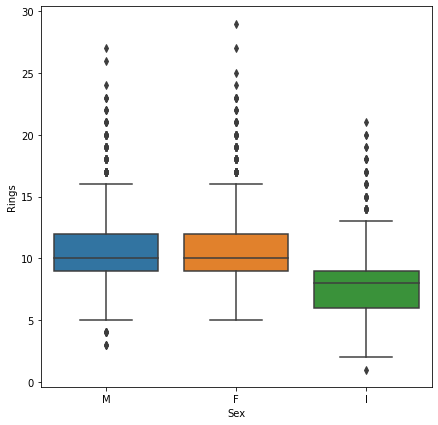

In [57]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Rings');

In [58]:
# However, the form of the distribution remains similar: samples are concentrated around the mean of the distribution.
# The difference is that for Infant abalones the mean of Rings is lower.

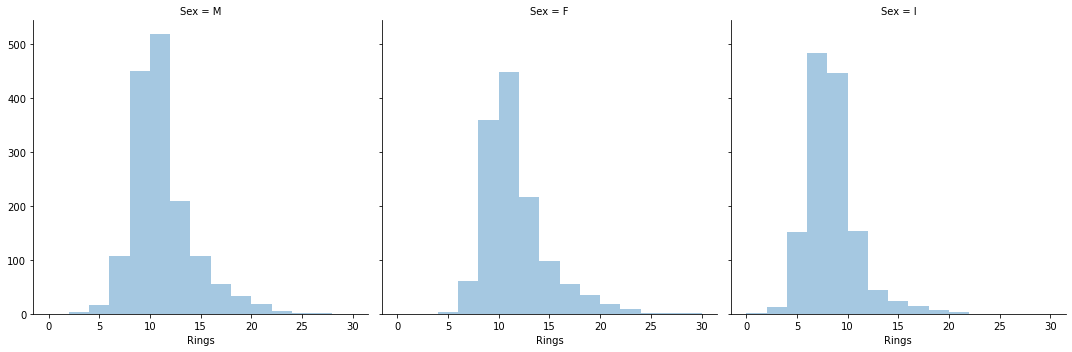

In [59]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2));

In [60]:
# For height

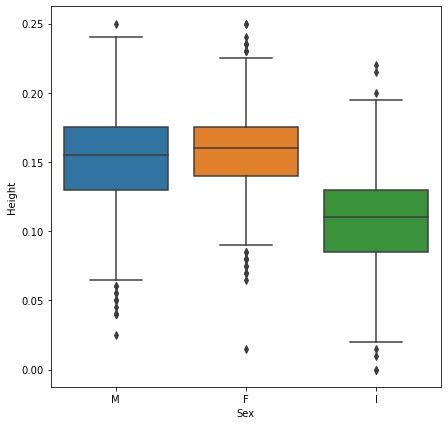

In [61]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Height');

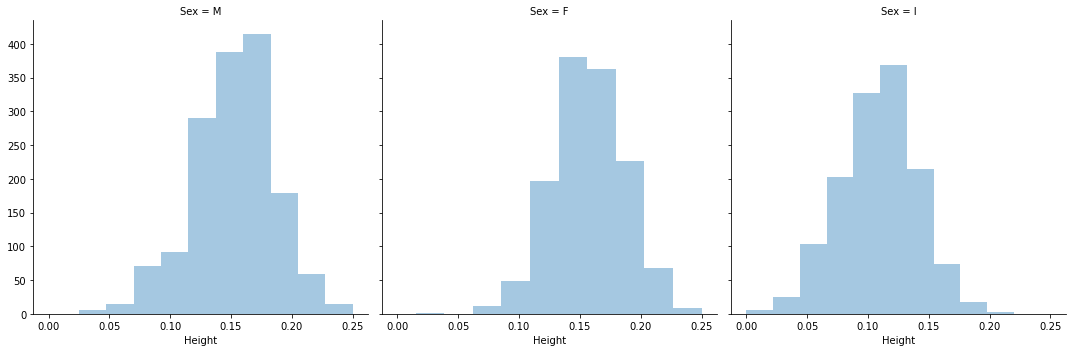

In [62]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Height', kde=False, bins= 10);

In [63]:
# For shell weight

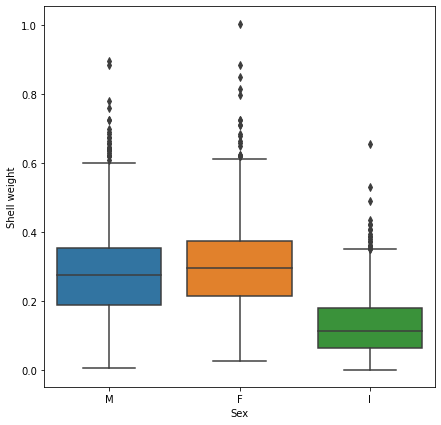

In [64]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Shell weight');

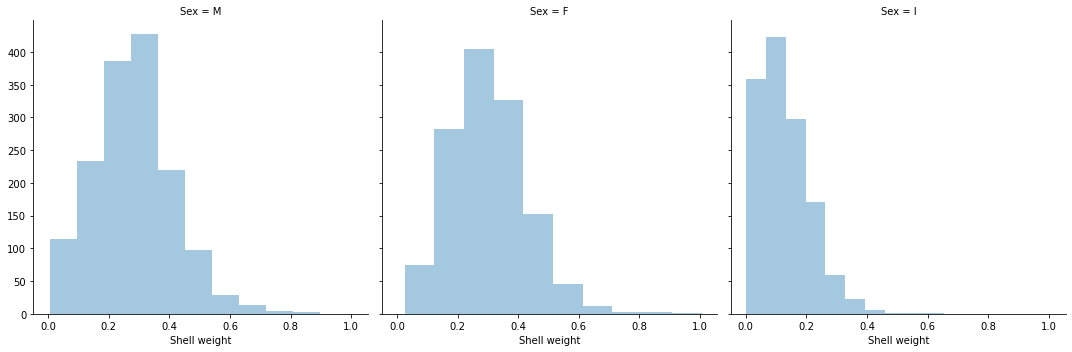

In [65]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Shell weight', kde=False, bins= 10);

In [66]:
# Finally, we analyze how the sex categories influence the correlations Rings & Height and Rings & Shell weight. We already concluded that these attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Height and Shell weight have stronger correlation to rings. Observing the regression curve for the Infant category, we notice that its inclination is closer to 45°.

# we conclude that it is possible to build a model to predict the target value in function of the independent attributes.

<Figure size 1440x360 with 0 Axes>

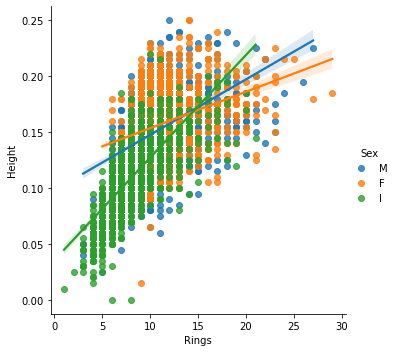

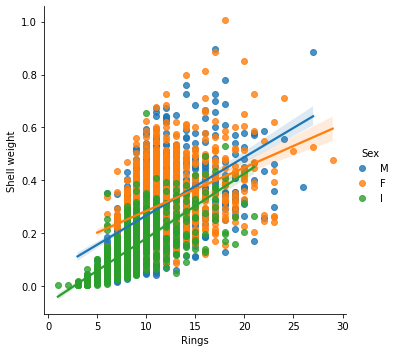

In [67]:
plt.figure(figsize=(20, 5))

sns.lmplot(data=abalone_data, x='Rings', y='Height', hue='Sex', fit_reg=True);
sns.lmplot(data=abalone_data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True);

In [68]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [69]:
# Convert categorical data to numerical data for machine learning model

In [70]:
# performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abalone_data['Sex']= le.fit_transform(abalone_data['Sex'])
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [71]:
# Outlier detection and removal
# Z score method

In [109]:
from scipy import stats
abalone_data_outlier= abalone_data.copy()
z = np.abs(stats.zscore(abalone_data_outlier))
print(z)

           Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0     1.152083  0.574376  0.431938  1.148233      0.641812        0.607590   
1     1.152083  1.448867  1.439814  1.278155      1.230626        1.171449   
2     1.280869  0.050260  0.122394  0.108855      0.309138        0.463243   
3     1.152083  0.699303  0.431938  0.368699      0.637730        0.648188   
4     0.064393  1.615437  1.540601  1.537999      1.272466        1.216557   
...        ...       ...       ...       ...           ...             ...   
4172  1.280869  0.341757  0.424756  0.670679      0.119462        0.048741   
4173  1.152083  0.549969  0.323969  0.108855      0.280697        0.359990   
4174  1.152083  0.633254  0.676725  1.710057      0.709296        0.750180   
4175  1.280869  0.841466  0.777513  0.280912      0.542959        0.774990   
4176  1.152083  1.549387  1.483026  1.450212      2.285929        2.644744   

      Viscera weight  Shell weight     Rings  
0           0.72

In [73]:
# Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [110]:
threshold = 3
print(np.where(z > 3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  694,  696,  696,  719,  719,  720,  720,
        744,  754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052,
       1174, 1193, 1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207,
       1207, 1209, 1209, 1257, 1417, 1421, 1425, 1426, 1426, 1426, 1427,
       1428, 1428, 1527, 1753, 1755, 1756, 1758, 1760, 1761, 1761, 1761,
       1762, 1762, 1762, 1820, 1981, 1985, 1986, 1986, 2088, 2106, 2106,
       2112, 2112, 2155, 2159, 2167, 2174, 2178, 2197, 2199, 2206, 2207,
       2272, 2273, 2303, 2332, 2332, 2332, 2333, 2342, 2356, 2366, 2379,
       2434, 2457, 2469, 2542, 2621, 2622, 2622, 2

In [ ]:
# we have detected and removed outlier

In [75]:
# The above data shows outlier where z score more than 3. The first array contains the list of row numbers and second array respective column numbers

In [78]:
# now we want to remove or filter the outliers and get the clean data. This can be done with just one line code as we have already calculated the Z-score.

In [79]:
abalone_data_outlier= abalone_data_outlier[(z < 3).all(axis=1)]
abalone_data.shape

(4175, 9)

In [80]:
abalone_data_outlier.shape

(4025, 9)

In [81]:
# So, above code removed around 150 rows from the dataset i.e. outliers have been removed.

In [82]:
# Separating Input Features and Output Features

In [83]:
X = abalone_data_outlier.drop('Rings', axis = 1) # Input/independent variable
y = abalone_data_outlier. Rings # Target / dependent variable

In [84]:
# Splitting the data into Train and Validation Set

In [85]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_val: independent/input feature data for testing the model; will be used to predict the output values
# y_val: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

In [86]:
# Building a model

In [87]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [88]:
# Train the model

In [90]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
# Predict on the validation data (X_val)
# Now we predict using our trained model on the validation set we created i.e. X_val and evaluate our model on unforeseen data.

In [93]:
pred = rfr.predict(X_val)

In [94]:
# Model Evaluation
#Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.
# There are so many evaluation metrics to use for regression problem, naming some - Mean Squared Error (in short MSE), Mean Absolute Error (in short MAE), Root Mean Squared Erro (in short RMSE), etc. However, RMSE is the metric for this data sprint.

In [95]:
# import mean squared error from sklearn.metric
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred)))

Root Mean Squared Error is:  1.9813081002407147


In [96]:
# Predict The Output For Testing Dataset
# We have trained our model, evaluated it and now finally we will predict the output/target for the testing data.

In [97]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [98]:
# converting categorical data to numerical

In [99]:
# performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['Sex']= le.fit_transform(test_data['Sex'])
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,1,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,1,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,0,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,0,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [100]:
test_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [101]:
# Outlier detection and removal

In [102]:
test_data_outlier= test_data.copy()
z = np.abs(stats.zscore(test_data_outlier))
print(z)

           Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0     1.284701  0.249205  0.376703  0.703524      0.647689        0.860437   
1     0.073113  1.365984  1.391178  1.018702      1.245930        1.183863   
2     0.073113  1.076079  0.886069  0.816087      1.065245        0.949714   
3     1.284701  0.497695  0.427214  0.602216      0.080114        0.123438   
4     1.284701  0.414865  0.528236  0.399601      0.558878        0.801900   
...        ...       ...       ...       ...           ...             ...   
1039  0.073113  2.111456  2.199352  1.221317      1.527676        1.501315   
1040  0.073113  0.040701  0.128406  0.512165      0.377213        0.199987   
1041  0.073113  0.372022  0.532493  0.613473      0.775332        0.715565   
1042  1.138475  1.160337  1.134366  0.703524      1.109099        1.108095   
1043  0.073113  0.042129  0.073638  0.613473      0.520128        0.483668   

      Viscera weight  Shell weight  
0           0.586372      

In [103]:
threshold = 3
print(np.where(z>threshold))

(array([  26,   45,   52,   62,   62,   87,  110,  248,  362,  386,  401,
        401,  415,  468,  474,  474,  569,  600,  600,  600,  649,  686,
        686,  686,  705,  716,  716,  833,  839,  859,  930,  940,  975,
        992,  992, 1030], dtype=int64), array([6, 3, 5, 1, 2, 5, 1, 7, 7, 5, 1, 2, 7, 7, 4, 5, 5, 4, 5, 6, 6, 4,
       5, 6, 7, 1, 2, 5, 5, 7, 7, 2, 5, 1, 2, 7], dtype=int64))


In [ ]:
# we have detected and removed outlier

In [105]:
test_data_outlier= test_data_outlier[(z < 3).all(axis=1)]
test_data.shape

(1044, 8)

In [106]:
test_data_outlier.shape

(1017, 8)

In [107]:
# Make prediction on test dataset

In [108]:
target = rfr.predict(test_data)
target[:5]

array([ 8.51,  6.12,  7.72, 11.7 ,  9.57])

In [117]:
# To create Dataframe of predicted value with particular respective index
result = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
result.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
result.columns = ["prediction"]

In [120]:
result

,prediction
0,8.51
1,6.12
2,7.72
3,11.70
4,9.57
...,...
1039,5.92
1040,10.26
1041,8.11
1042,10.21


In [ ]:
# Here we have predicted the rings of each abalone which will lead us to the age of that abalone showing in respective index. 